In [1]:
## Path for modules

import sys

import numpy as np
import xarray as xr

from netCDF4 import Dataset

sys.path.insert(0,"/mnt/meom/workdir/henelle/Notebooks/git/xscale")
import xscale
import xscale.spectral.fft as xfft

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy.ma as ma

import matplotlib.cm as mplcm
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date, datetime
from xhistogram.xarray import histogram

import pandas as pd

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [2]:
def plot_surf_plus_histo(data1,data2,hist_data1_00,hist_data1_T0,hist_data2_00,hist_data2_T0,lon,lat,i,lonmin,lonmax,
                         latmin,latmax,vmin_data1,vmax_data1,vmin_data2,vmax_data2,cmap_data1,cmap_data2,
                         var_title_data1,var_title_data2,date,season):
    
    fig = plt.figure(figsize=(19,18))
    
    # Set up subplot grid
    #gridspec.GridSpec(2,2)
    
    ax1 = fig.add_subplot(221,projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(222,projection=ccrs.PlateCarree())
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    #ax1.subplot2grid((2,2), (0,0))
    #ax2.subplot2grid((2,2), (0,1))
    #ax3.subplot2grid((2,2), (1,0))
    #ax4.subplot2grid((2,2), (1,1))
    
    # Adjust subplots
    plt.subplots_adjust(hspace=0.1,wspace=0.025)
    
    norm_fld_data1 = colors.Normalize(vmin=vmin_data1, vmax=vmax_data1, clip=False)
    norm_fld_data2 = colors.Normalize(vmin=vmin_data2, vmax=vmax_data2, clip=False)
    
    pcolor1 = ax1.pcolormesh(lon,lat,data1,cmap=cmap_data1,vmin=vmin_data1,vmax=vmax_data1,norm = norm_fld_data1)
    pcolor2 = ax2.pcolormesh(lon,lat,data2,cmap=cmap_data2,vmin=vmin_data2,vmax=vmax_data2,norm = norm_fld_data2)
    
    # Add the Azores
    land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor='dimgray')
    ax1.add_feature(land)
    ax2.add_feature(land)
    
    
    # Colorbar ax1
    cax1,kw1   = mpl.colorbar.make_axes(ax1,location='bottom',pad=0.05,shrink=0.5)
    out1       = fig.colorbar(pcolor1,cax=cax1,extend='both',**kw1)
    out1.set_label(var_title_data1,size=14)
    out1.ax.tick_params(labelsize=14)
    xticks_ax1 = np.linspace(vmin_data1,vmax_data1,num=5)
    out1.set_ticks(xticks_ax1)
    
    # Colorbar ax2
    cax2,kw2   = mpl.colorbar.make_axes(ax2,location='bottom',pad=0.05,shrink=0.5)
    out2       = fig.colorbar(pcolor2,cax=cax2,extend='max',**kw2)
    out2.set_label(var_title_data2,size=14)
    out2.ax.tick_params(labelsize=14)
    xticks_ax2 = np.linspace(vmin_data2,vmax_data2,num=5)
    out2.set_ticks(xticks_ax2)
    
    # Grid    
    gl1            = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,lw=1,color='gray',alpha=0.8, ls='--')
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    gl1.xlabel_style = {'size': 12, 'color': 'dimgray'}
    gl1.ylabel_style = {'size': 12, 'color': 'dimgray'}
    gl1.xlabels_top = False
    gl1.ylabels_right = False
    gl2            = ax2.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,lw=1,color='gray',alpha=0.8, ls='--')
    gl2.xformatter = LONGITUDE_FORMATTER
    gl2.yformatter = LATITUDE_FORMATTER
    gl2.xlabel_style = {'size': 12, 'color': 'dimgray'}
    gl2.ylabel_style = {'size': 12, 'color': 'dimgray'}
    gl2.xlabels_top = False
    gl2.ylabels_right = False
    gl2.ylabels_left = False
    
    # Adjusting axes
    ax1.set_xlim((-36, -26))
    ax1.set_ylim((25, 40))
    ax2.set_xlim((-36, -26))
    ax2.set_ylim((25, 40))
    
    
    # Chosen region
    ax1.plot([lonmin, lonmax], [latmin, latmin],color='black',linewidth=4)
    ax1.plot([lonmin, lonmax], [latmax, latmax],color='black',linewidth=4)
    ax1.plot([lonmin, lonmin], [latmin, latmax],color='black',linewidth=4)
    ax1.plot([lonmax, lonmax], [latmin, latmax],color='black',linewidth=4)
    ax2.plot([lonmin, lonmax], [latmin, latmin],color='black',linewidth=4)
    ax2.plot([lonmin, lonmax], [latmax, latmax],color='black',linewidth=4)
    ax2.plot([lonmin, lonmin], [latmin, latmax],color='black',linewidth=4)
    ax2.plot([lonmax, lonmax], [latmin, latmax],color='black',linewidth=4)
    
    
    # Adding histograms
    hist_data1_00.plot(ax=ax3,label='no tide',lw=3.0,color='lightseagreen')
    hist_data1_T0.plot(ax=ax3,label='tide',lw=3.0,linestyle='-.',color='darkred')
    ax3.set_xlabel('24h filtered '+var_title_data1,size=16)
    ax3.set_ylabel('')
    ax3.tick_params(labelsize=15)

    hist_data2_00.plot(ax=ax4,label='no tide',lw=3.0,color='lightseagreen')
    hist_data2_T0.plot(ax=ax4,label='tide',lw=3.0,linestyle='-.',color='darkred')
    ax4.set_xlabel('24h filtered '+var_title_data2,size=16)
    ax4.set_ylabel('')
    ax4.tick_params(labelsize=15)
    
    plt.draw()
    handles, labels = ax3.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center',frameon=True,shadow=True,fontsize=16,bbox_to_anchor=(0.5, 0., 0.5, 0.5),markerscale=5.0,
              framealpha=0.8,edgecolor='black',facecolor='white')

    ax3.set_xlim((-0.5,0.5))
    ax4.set_xlim((0,0.5))
    
    
    # Figure titles
    ts = pd.to_datetime(str(date))
    d = ts.strftime('%d/%m/%y %H:%M')
    
    ax1.set_title(var_title_data1+' no tide; '+str(d),size=16, y=1.05)
    ax2.set_title(var_title_data2+' no tide; '+str(d),size=16, y=1.05)
    plt.suptitle(season,size=20,y=0.95)
    #plt.tight_layout()
    #fig.set_tight_layout({'pad': 1})
    
    plt.savefig('./maps_region_PDF/Box+Hist_24h_ave_after_mean_file_'+season+'_'+'.png',
                dpi=100,bbox_inches='tight',pad_inches=0.1)
    #plt.clf()
    

In [3]:
## Dataset

dirfilt_24h_ave = "/mnt/meom/workdir/henelle/eNATL60/JFM-JAS/"

In [4]:
## All files, JAS

tfile_JAS_strain00 = dirfilt_24h_ave + 'eNATL60ACO-BLB002_y2009_JAS.1d_strain_after_mean10m.nc'
tfile_JAS_strainT0 = dirfilt_24h_ave + 'eNATL60ACO-BLBT02_y2009_JAS.1d_strain_after_mean10m.nc'
tfile_JAS_curl00   = dirfilt_24h_ave + 'eNATL60ACO-BLB002_y2009_JAS.1d_curl_after_mean10m.nc'
tfile_JAS_curlT0   = dirfilt_24h_ave + 'eNATL60ACO-BLBT02_y2009_JAS.1d_curl_after_mean10m.nc'

In [5]:
ds_JAS_strain00 = xr.merge([xr.open_mfdataset(tfile_JAS_strain00,combine='by_coords')])
ds_JAS_strainT0 = xr.merge([xr.open_mfdataset(tfile_JAS_strainT0,combine='by_coords')])
ds_JAS_curl00   = xr.merge([xr.open_mfdataset(tfile_JAS_curl00,  combine='by_coords')])
ds_JAS_curlT0   = xr.merge([xr.open_mfdataset(tfile_JAS_curlT0,  combine='by_coords')])
#ds_JAS_strain00

In [6]:
navlon = ds_JAS_strain00.nav_lon
navlat = ds_JAS_strain00.nav_lat

In [7]:
print(navlon.shape)
print(navlat.shape)

(1191, 781)
(1191, 781)


In [8]:
sbins = np.arange(0.0,0.5, 0.025)
cbins = np.arange(-0.5,0.5, 0.025)

In [9]:
now_hist = datetime.now()
current_time_hist = now_hist.strftime("%H:%M:%S")
print("Current Time, before histograms =", current_time_hist)

Current Time, before histograms = 11:03:27


In [10]:
hist_JAS_strain00 = histogram(ds_JAS_strain00.sostrainoverf,bins=[sbins])
hist_JAS_strainT0 = histogram(ds_JAS_strainT0.sostrainoverf,bins=[sbins])
hist_JAS_curl00   = histogram(ds_JAS_curl00.socurloverf,bins=[cbins])
hist_JAS_curlT0   = histogram(ds_JAS_curlT0.socurloverf,bins=[cbins])

In [11]:
now_start_plot = datetime.now()
current_time_start_plot = now_start_plot.strftime("%H:%M:%S")
print("Current Time, before plotting =", current_time_start_plot)

Current Time, before plotting = 11:03:27


fig, axes = plt.subplots(ncols=2)

hist_JAS_curl00.plot(ax=axes[0],label='no tide')
hist_JAS_curlT0.plot(ax=axes[0],label='tide')
axes[0].set_xlabel('24h filtered curl/f')
axes[0].set_ylabel('')


hist_JAS_strain00.plot(ax=axes[1],label='notide')
hist_JAS_strainT0.plot(ax=axes[1],label='tide')
axes[1].set_xlabel('24h filtered strain/f')
axes[1].set_ylabel('')


plt.tight_layout()
plt.draw()
plt.legend()
plt.suptitle('JAS',y=1.1)

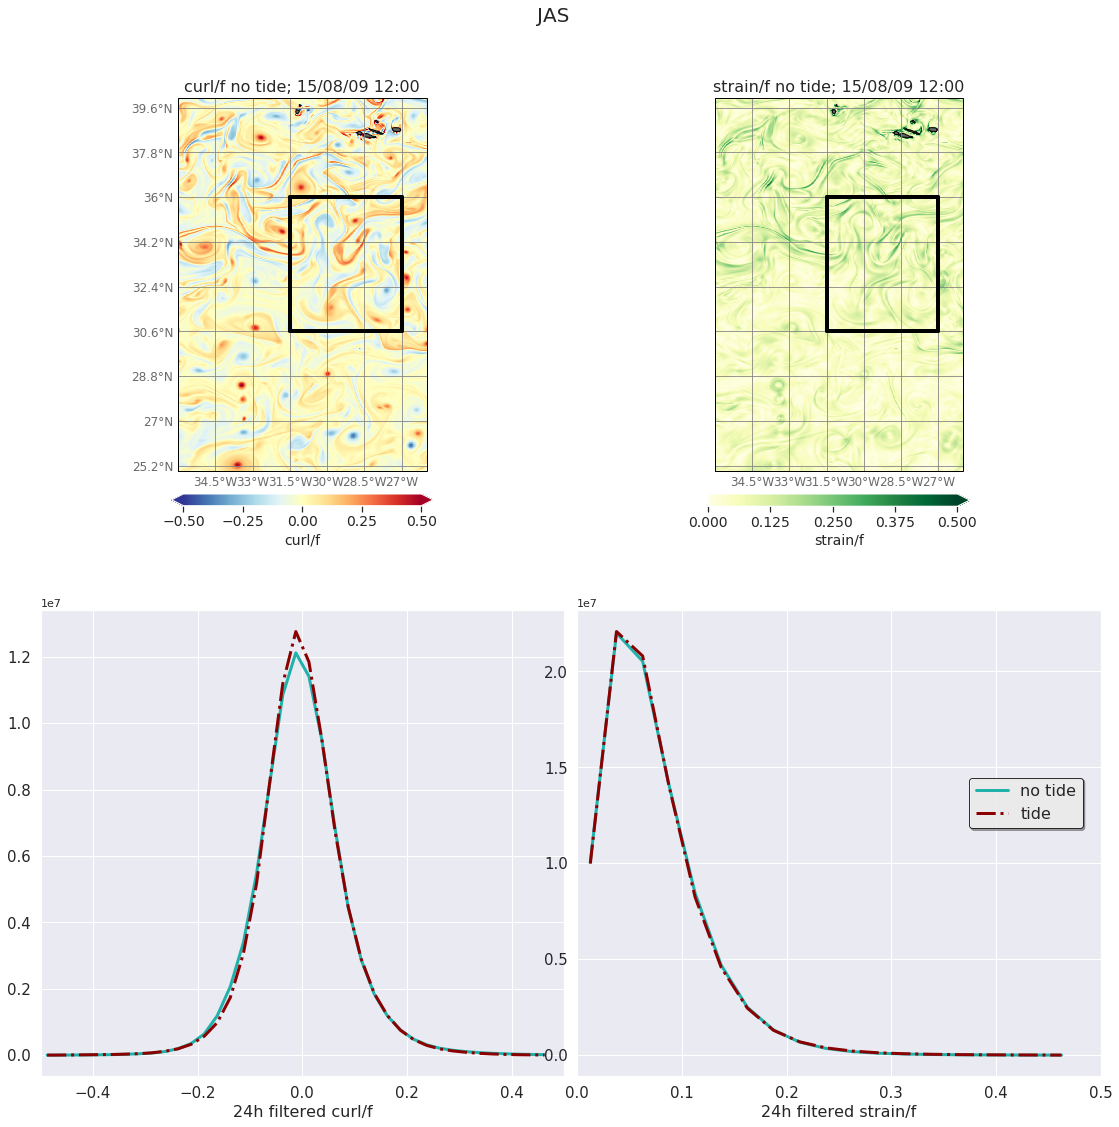

In [12]:
plot_surf_plus_histo(ds_JAS_curl00.socurloverf[45,:,:],ds_JAS_strain00.sostrainoverf[45,:,:],hist_JAS_curl00,
                     hist_JAS_curlT0,hist_JAS_strain00,hist_JAS_strainT0,navlon,navlat,45,lonmin=-31.5,lonmax=-27,
                     latmin=30.6,latmax=36,vmin_data1=-0.5,vmax_data1=0.5,vmin_data2=0,vmax_data2=0.5,
                     cmap_data1='RdYlBu_r',cmap_data2='YlGn',var_title_data1='curl/f',var_title_data2='strain/f',
                     date=str(ds_JAS_strain00.time_counter.values[45]),season='JAS')

In [13]:
now_end_plot = datetime.now()
current_time_end_plot = now_end_plot.strftime("%H:%M:%S")
print("Current Time, after plotting =", current_time_end_plot)

Current Time, after plotting = 11:04:04
